In [14]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from helpers import colorize

## I. Load data

In [5]:
data_folder = Path('./data')

TM_pix = np.load(data_folder/'TM_pix.npz')['TM']

# set to 0 values below 1e-3 of the maximum value
max_TM = np.max(np.abs(TM_pix))
TM_pix[np.abs(TM_pix)<1e-3*max_TM] = 0
TM_pix/=np.linalg.norm(TM_pix)

# this indicates the number of input and output polarizations
pola_inout = (1,2)
# number of input and output pixels
N2_out, N2_in = TM_pix.shape
N2_out = N2_out//2
N_in = int(np.sqrt(N2_in))
N_out = int(np.sqrt(N2_out))


## II. SVD

In [6]:
U, s, Vh = np.linalg.svd(TM_pix, full_matrices=False)

### II.1 Distribution

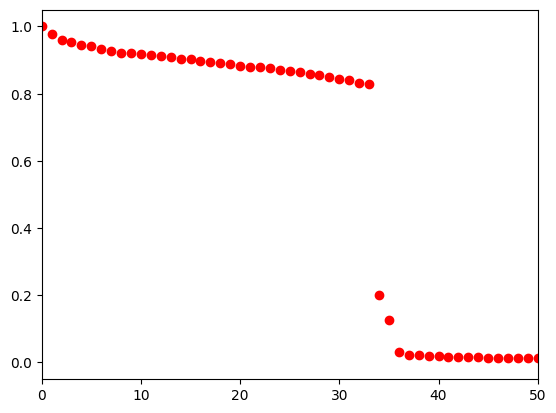

In [13]:
s = s/s[0]
plt.figure()
plt.plot(s, 'ro')
plt.xlim(0, 50)
plt.show()

s_new = s.copy()
s_new[34:] = 0



### II.2 Singilar vectors

In [ ]:
grid = [6,6]

toimg = lambda x,n: colorize(x.reshape([n]*2), theme='white')

plt.figure()
plt.imshow(toimg(U[:,34]))